In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/FabioGagliardiIts/datasets/main/Position_Salaries.csv")
display(df)



,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


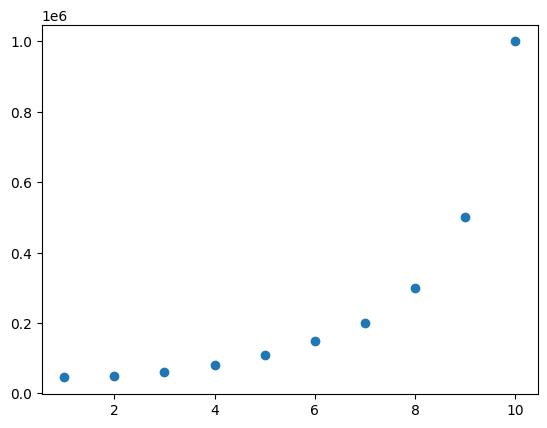

In [ ]:
x = df["Level"].to_numpy()
y = df["Salary"].to_numpy()

plt.scatter(x, y)
plt.show()

Dalla visualizzazione dei dati appare subito evidente che la regressione lineare è un metodo che porterà verosimilmente molti errori.


In [ ]:
def plot_regression(x: np.array, y: np.array, y_pre: np.array):
  plt.scatter(x, y, color = 'blue')
  plt.plot(x, y_pre, color = 'red')
  plt.xlabel('Position level')
  plt.ylabel('Salary')
  plt.show()

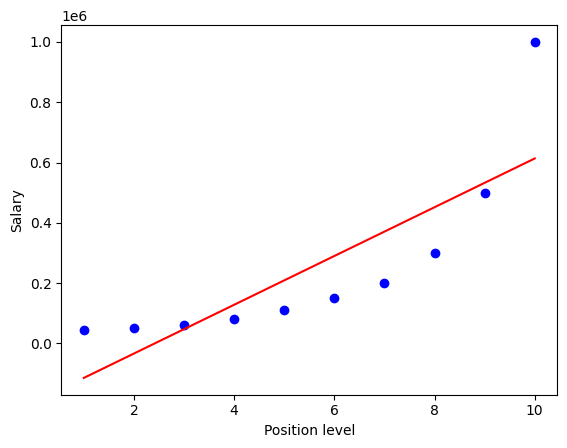

In [ ]:
from sklearn.linear_model import LinearRegression

x = x.reshape(-1, 1)

lin_reg = LinearRegression()
lin_reg.fit(x, y)

y_reg_pred = (lin_reg.coef_ * x) + lin_reg.intercept_

plot_regression(x, y, y_reg_pred)


# **Dalla retta alla curva**



Proviamo a capire come arrivare ad una curva partendo da quello che già sappiamo sulla costruzione di una retta

\begin{align}
  y = ax + b
\end{align}

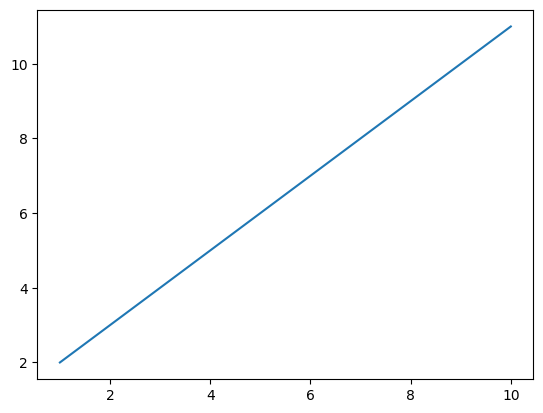

In [ ]:
a = 1
b = 1
y_1 = (a * x) + b

plt.plot(x, y_1)
plt.show()

Cominciamo ad aggiungere nuovi termini.
Le feature restano sempre quelle, proveremo ad aggiungere nuovi termini determinati da una serie di potenze sempre crescenti.

Otteremo,così facendo un polinomio di grado "n", che dovrebbbe approssimare al meglio l'andamenteo non lineare dei mie dati.





\begin{align}
  y =  a_1x + a_2x^2+....a_nx^n+ b
\end{align}

**parametri**: $a_1, a_2,..,a_n$

**iperparametri**: $x, x^2, ..., x^n$

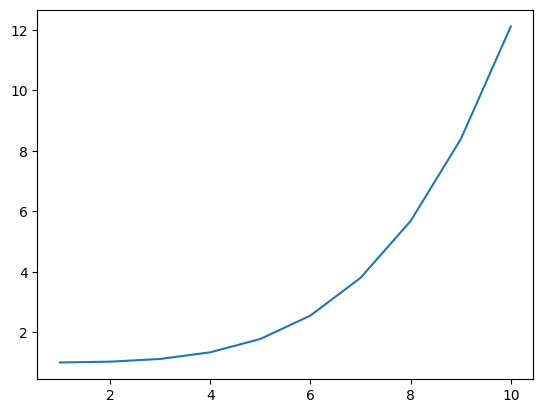

In [ ]:
from matplotlib import animation
# =================
# da usare in Colab
# =================
from IPython.display import HTML



y_2 = (0.001 * x +                 # a_1 * x
       0.001 * np.power(x, 2) +    # a_2 * x^2
       0.001 * np.power(x, 3) +    # a_3 * x^2
       0.001 * np.power(x, 4) + b) # a_4 * x^4

plt.plot(x, y_2)
plt.show()




# **La regressione polinominale**

a questo punto proviamo a generare nuovi termini dalle **feature** iniziali con **sklearn**.

Il risultato sarà un nuovo array con le **feature** replicate ed elevate a potenza.

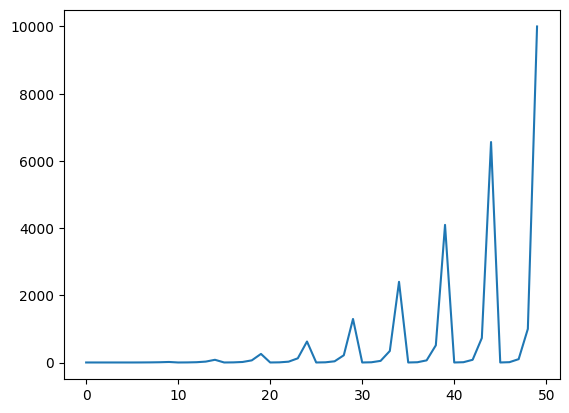

In [ ]:
from sklearn.preprocessing import PolynomialFeatures


poly_regr = PolynomialFeatures(degree = 4)
x_poly = poly_regr.fit_transform(x)

x_poly_plot = x_poly.flatten()
plt.plot(np.arange(x_poly_plot.size), x_poly_plot)
plt.show()

Infine useremo questi dati come se fossero il contenuto di un nuovo dataset,formato da n colonne su cui effettuare la regressione lineare multipla.

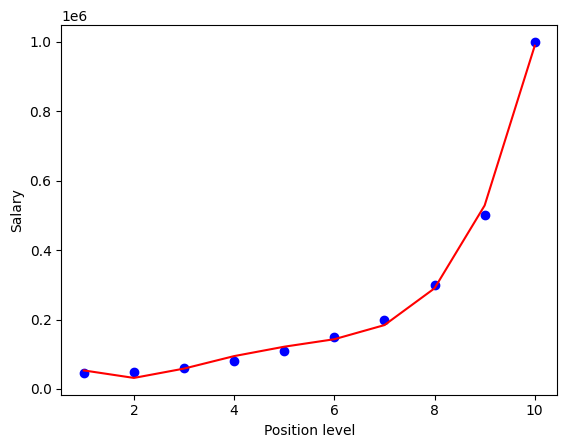

In [ ]:


poly_reg = LinearRegression()
poly_reg.fit(x_poly, y)

poly_y_pred = poly_reg.predict(x_poly)

plot_regression(x, y, poly_y_pred)


In [ ]:
print(poly_reg.coef_.size)

# y_curve = (poly_reg.coef_ * x) + poly_reg.intercept_

# plot_regression(x, y, y_curve)

5
